In [55]:
import numpy as np
import pandas as pd
import pyodbc
import sqlite3
import math
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler 
from scipy.stats import rv_discrete
from scipy.stats import t, binom, chi2, f
from scipy.stats import ttest_ind
from sklearn.utils import resample

import importlib
import funciones_eda
importlib.reload(funciones_eda)
from funciones_eda import *

import importlib
import funciones_m
importlib.reload(funciones_m)
from funciones_m import *

import importlib
import funciones_distribucion
importlib.reload(funciones_distribucion)
from funciones_distribucion import *

import importlib
import funciones_pruebas_significativas
importlib.reload(funciones_pruebas_significativas)
from funciones_pruebas_significativas import *

In [56]:
url = 'df_filtrado.csv'
df = pd.read_csv(url, index_col=None)
df.drop('index', axis=1, inplace=True)

### Experimentos estadísticos y pruebas significativas

In [57]:
Prueba_mannwhitneyu(df,'TIPOL_TRANS_NAME','QTY','Minimercado Independ','Superete Independ')

Tasa de venta Grupo A Minimercado Independ: 196.34% 
Tasa de venta Grupo B Superete Independ: 526.27%
Estadístico U: 89790622.0
Valor p: 0.0
Se rechaza la hipótesis nula: las distribuciones son diferentes.


In [58]:
Prueba_mannwhitneyu_bidireccional(df,'TIPOL_TRANS_NAME','QTY','Minimercado Independ','Superete Independ')

Tasa de venta Grupo A Minimercado Independ: 196.34% 
Tasa de venta Grupo B Superete Independ: 526.27%
Estadístico U: 89790622.0
Valor p: 0.0
Conclusión: Se rechaza la hipótesis nula: el grupo 1 tiene valores significativamente menores que el grupo 2.


Grupo A (Minimercado Independ): Tiene una  promedio compra del 196.34%.
Grupo B (Superete Independ): Tiene una promedio de compra significativamente más alta, del 526.27%.

Esto indica que, en promedio, los clientes del grupo "Superete Independ" compran aproximadamente 5.26 veces la cantidad base, mientras que los del grupo "Minimercado Independ" compran alrededor de 1.96 veces la cantidad base.


**prueba de hipotesis**

La prueba muestra una diferencia estadísticamente significativa entre los grupos.
Esto significa que el comportamiento de compra (medido por QTY) es significativamente diferente entre los clientes de los grupos "Minimercado Independ" y "Superete Independ."

Los clientes del grupo "Superete Independ" tienden a realizar compras más grandes o frecuentes en comparación con "Minimercado Independ".

In [59]:
df['TIPOL_TRANS_NAME'].value_counts()

TIPOL_TRANS_NAME
Minimercado Independ    20777
Superete Independ       13876
Conveniencia Indep         31
Merc Saludab Indepen        9
Name: count, dtype: int64

### Remuestreo 

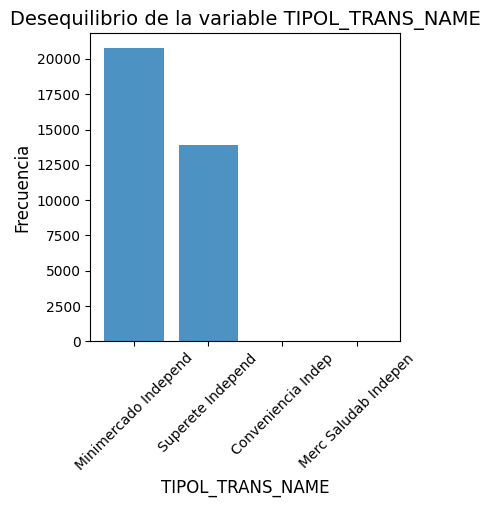

In [60]:
desequilibrio_datos(df,'TIPOL_TRANS_NAME')

Categorías mayoritarias:
Minimercado Indep es la categoría con mayor frecuencia, superando las 20,000 muestras.
Superete Indep ocupa el segundo lugar, con más de 15,000 muestras.
Conveniencia Indep tiene una frecuencia considerablemente menor, posiblemente por debajo de 2,500 muestras.
Merc Saludab Indepen es la categoría menos representada, con una frecuencia cercana o incluso menor a 1,000 muestras.

por lo que Algunas categorías como Minimercado Indep y Superete Indep, pueden corresponder a mercados más amplios y comunes, mientras que las otras representan nichos más pequeños.

Realizar análisis desagregados para las clases Conveniencia Indep y Merc Saludab Indepen para entender mejor su comportamiento y patrones únicos o realizar Implementación de técnicas de balanceo.

#### Sobremuestreo para las caracteristicas de 'Minimercado Independ','Superete Independ'

In [61]:
df_balanceado=equilibrar_datos(df,'TIPOL_TRANS_NAME','Minimercado Independ','Superete Independ')

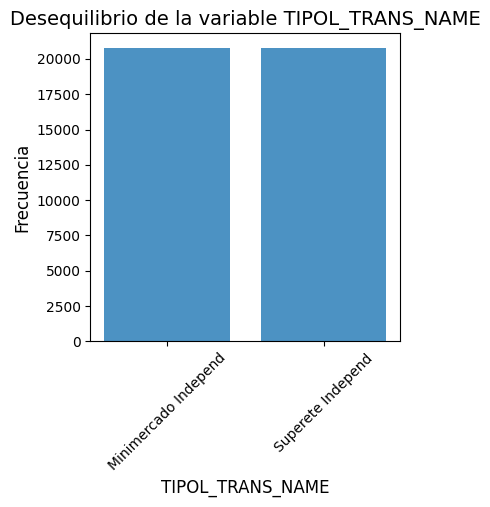

In [62]:
desequilibrio_datos(df_balanceado,'TIPOL_TRANS_NAME')

"Minimercado Independ" y "Superete Independ" tendrán exactamente la misma cantidad de datos.
Las otras dos categorías quedarán fuera del análisis, ya que no fueron incluidas en el filtrado inicial. Las categorías "Conveniencia Indep" y "Merc Saludab Indepen" son tan pequeñas que incluirlas en el modelo sería poco representativo y podría generar ruido.

Ambas clases ahora tienen la misma cantidad de muestras, lo que elimina el sesgo en la frecuencia de las observaciones.
Los modelos tienen más probabilidades de aprender patrones significativos de ambas clases de manera equitativa.